In [77]:
import pandas as pd

df = pd.read_csv('busi_train.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [78]:
print("Dataset has {} entries and {} features".format(*df.shape))

Dataset has 1192 entries and 30 features


In [79]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
country,0.0
isonum,0.0
isocode,0.0
year,0.0
rank_busi,0.0
busi,0.0
start,0.0
start_year,0.0
ahead,0.0
ahead_year,0.0


In [80]:
df = df.drop(['start', 'ahead'], axis = 1)
y = df['busi']
df = df.drop(['rank_busi', 'busi'], axis = 1)
X = df

In [ ]:
from featuretools.selection import remove_low_information_features, remove_highly_null_features, remove_single_value_features, remove_highly_correlated_features

df = remove_low_information_features(df)

df = remove_highly_null_features(df)

df = remove_single_value_features(df)

df = remove_highly_correlated_features(df)

In [81]:
import evalml
import woodwork as ww

problem_type = 'regression'
objective =  'auto'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


automl = evalml.automl.AutoMLSearch(X_train, y_train, problem_type=problem_type, objective = objective)
automl.search()

best_pipeline = automl.best_pipeline

Using default limit of max_batches=1.

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for Root Mean Squared Error. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: linear_model, decision_tree, extra_trees, random_forest, xgboost, lightgbm, catboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mean Baseline Regression Pipeline        Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 11.333
Batch 1: (2/9) Decision Tree Regressor w/ Imputer + ... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 3.137
Batch 1: (3/9) Extra Trees Regressor w/ Imputer + On... Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 2.171
Batch 1: (4/9) XGBoost Regressor w/ Imputer + One Ho... Elapsed:00:02
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 1.413
Batch 1: (5/9) CatBoost Regressor w/ Imputer            Elapsed:00:04
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 9.164
Batch 1: (6/9) Random Forest Regressor w/ Imputer + ... Elapsed:00:05
	Starting cross validation
	Finished cross validation - mean Root Mean Squared Error: 2.156
Batch 1: (7/9) LightGBM Reg

In [82]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Regressor w/ Imputer + One Hot Encoder,1.413381e+00,1.389759,8.752902e+01,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,8,Elastic Net Regressor w/ Imputer + One Hot Enc...,2.081045e+00,2.000506,8.163787e+01,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,5,Random Forest Regressor w/ Imputer + One Hot E...,2.155953e+00,2.172131,8.097693e+01,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,Extra Trees Regressor w/ Imputer + One Hot Enc...,2.170560e+00,2.043977,8.084804e+01,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,6,LightGBM Regressor w/ Imputer + One Hot Encoder,2.603983e+00,2.597782,7.702373e+01,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,1,Decision Tree Regressor w/ Imputer + One Hot E...,3.137064e+00,3.030957,7.232008e+01,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,CatBoost Regressor w/ Imputer,9.164201e+00,9.226536,1.913956e+01,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,0,Mean Baseline Regression Pipeline,1.133336e+01,11.399235,0.000000e+00,False,{'Baseline Regressor': {'strategy': 'mean'}}
8,7,Linear Regressor w/ Imputer + One Hot Encoder ...,4.552610e+10,1.633455,-4.017001e+11,True,{'Imputer': {'categorical_impute_strategy': 'm...


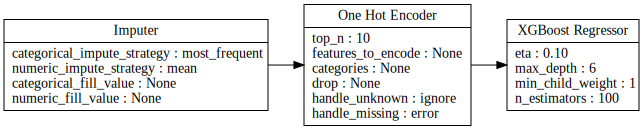

In [83]:
best_pipeline.graph()

In [84]:
best_pipeline.feature_importance

,feature,importance
0,ippr,0.337235
1,logis,0.217539
2,creddtf,0.145753
3,insdtf,0.077318
4,stardtf,0.067019
...,...,...
84,ippr_year_2007,0.000000
85,ippr_year_2008,0.000000
86,ippr_year_2012,0.000000
87,ippr_year_2013,0.000000


In [85]:
best_pipeline.graph_feature_importance()

In [86]:
predictions = best_pipeline.predict(X_test)
predictions = predictions.to_series()

In [87]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R2: ' + str(r2_score(y_test,  predictions)))
print('MSE: ' + str(mean_squared_error(y_test, predictions, squared = True)))
print('RMSE: ' + str(mean_squared_error(y_test, predictions, squared = False)))
print('MAE: ' + str(mean_absolute_error(y_test, predictions)))

R2: 0.9854992619091882
MSE: 1.7111332536110995
RMSE: 1.3081029216430562
MAE: 0.9346232766273034


In [92]:
best_pipeline.save('test.model')